In [2]:
import pandas as pd
from kan import *

In [3]:
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

In [4]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

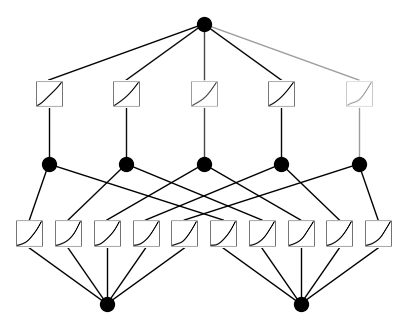

In [7]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [8]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.37e-01 | test loss: 1.42e-01 | reg: 2.80e+01 : 100%|██| 20/20 [00:05<00:00,  3.92it/s]


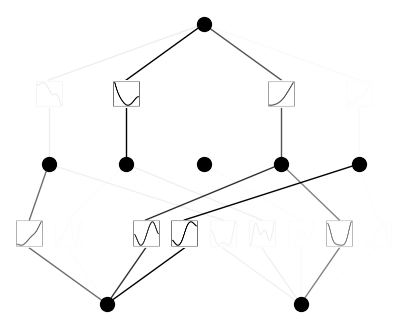

In [9]:
model.plot()

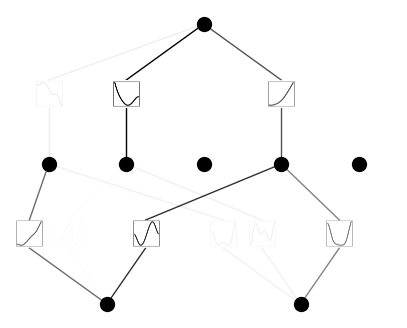

In [10]:
model.prune()
model.plot(mask=True)

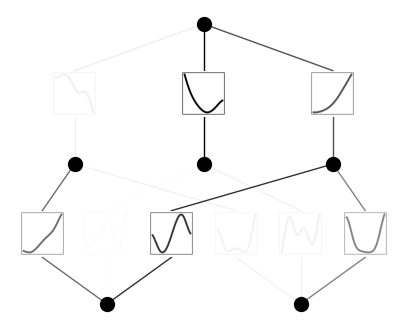

In [11]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [14]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 3.53e-03 | test loss: 3.73e-03 | reg: 8.55e+00 : 100%|██| 50/50 [00:09<00:00,  5.36it/s]


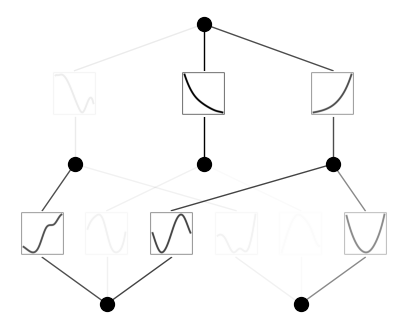

In [15]:
model.plot()